# Линейная классификация

Рассмотрим в работе способы построения линейной модели классификации.

Линейный классификатор представляет собой линейную модель, разделяющую два класса (-1, 1). Линейная модель описывается следующей формулой $\langle \omega, x \rangle + b = y$. Вектор весов $\omega$ - вектор нормали этой линейно модели. При $y = 0$, все точки $x$ принадлежат этой разделяющей прямой, при $y > 0$ объеты $x$ лежат с той стороны прямой линии, куда смотрит вектор весов $\omega$, при $y < 0$ с другой стороны прямой линии. Таким образом линейная модель разделяет все объекты на положительный и отрицательные, причем чем дальше объект лежит от прямой, тем большее абсолютное значение он имеет.

Необходимо ввести обозначение отступа:

$$M = y \langle \omega, x \rangle$$

Таким образом, если объект будет лежать со стороны своего класса (классифицироваться правильно), то $M$ всегда будет иметь положительное значение. В случае неправилной классификации отступ будет отрицательным.

Введем несколько loss-функцию, которые будет оптимизировать:

1. логистическая: $$\bar L(M) = \ln(1+ \exp(-M))$$

2. экспоненциальны: $$\bar L(M) = \exp(-M)$$

3. кусочно-линейная: $$\bar L(M) = max(0, 1-M))$$

Таким образом для каждого объекта будет вычислена его собственный штраф. Чтобы получить полную функцию потеря - просто проссумируем штрафы всех объектов.
Таким образом у нас будет функция, подсчитывающая штрафы для конкретной модели. Необходимо ее оптимизировать, для этого надо вычислить градиент и начать движение (изменение весов модели $\omega$) в сторону антиградиента с некоторым постоянным шагом.

## Задача
1. Написать функцию расчета функции потерь (loss-функции) и градиента функции. (выбрать любую функцию)
2. Реализовать градиентный спуск по всем данным.
3. Реализовать стохастический градиентный спуск.

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import ffmpeg
%matplotlib inline

### Задача 1
Напишите две функции, которые будут получать на вход вектор весов, признаки и целевую переменную. Функции должны возвращать суммарную ошибку и градиент.

In [51]:
def loss(w, x, y):
    X = np.array(list(map(lambda x0, x1: np.append(np.array(x0), x1), np.ones(len(x)), x)))
    M = np.dot(X, w) * y.reshape(-1, 1)
    loss = np.log(1 + np.exp(-M))
    return np.sum(loss)

def grad_loss(w, x, y):
    X = np.array(list(map(lambda x0, x1: np.append(np.array(x0), x1), np.ones(len(x)), x)))
    M = np.dot(X, w) * y.reshape(-1, 1)
    grad_loss = - np.exp(-M) / (1 + np.exp(-M)) * y.reshape(-1, 1)
    return np.array([np.sum(grad_loss),
                     np.sum(grad_loss * x[:, 0].reshape(-1, 1)),
                     np.sum(grad_loss * x[:, 1].reshape(-1, 1))])

In [39]:
x = np.random.sample((3, 2))
y = np.random.sample((1, 3))
w = np.random.sample((3, 1))
print(f'x:\n{x}\n\ny:\n{y}\n\nw:\n{w}')

x:
[[0.12845075 0.71601691]
 [0.26895908 0.26818246]
 [0.74469509 0.39571111]]

y:
[[0.35178665 0.75916715 0.76969566]]

w:
[[0.39455308]
 [0.61149282]
 [0.39274084]]


In [46]:
x[:, 0]

array([0.12845075, 0.26895908, 0.74469509])

In [4]:
X = np.array(list(map(lambda x0, x1: np.append(np.array(x0), x1), np.ones(len(x)), x)))
np.dot(X, w)

array([[1.17562446],
       [1.29309812],
       [1.22127   ]])

In [5]:
np.dot(X, w) * y.reshape(-1, 1)

array([[0.74523839],
       [1.25306389],
       [0.52055065]])

In [6]:
loss(w, x, y)

array([[0.3884011 ],
       [0.25124756],
       [0.46636782]])

In [52]:
grad_loss(w, x, y)

array([-0.68149232, -0.27742351, -0.28212936])

Дан набор данных.
Проведена нормализация данных по признакам и выставлены классы (-1, 1).

Проведите случайную линейную модель, постройте ее на графике и вычислите для нее суммарную функцию ошибки.
Проверьте, что суммарная функция ошибки считается правильно.

132.53880549447638


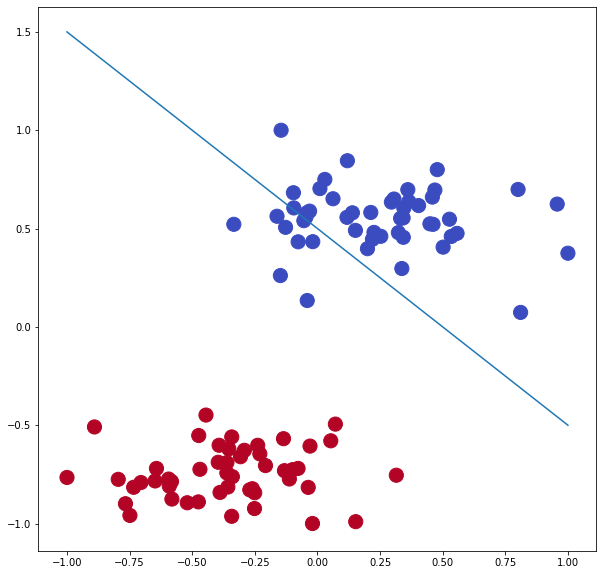

In [70]:
X, Y = make_blobs(n_samples=100, n_features=2, centers=2 ,cluster_std=1, random_state=17, center_box=(-10, 10))
cmap = plt.cm.coolwarm
plt.figure(figsize=(10,10))
X[:,0] = 2 * (X[:,0] - X[:,0].min()) / (X[:,0].max() - X[:,0].min()) - 1
X[:,1] = 2 * (X[:,1] - X[:,1].min()) / (X[:,1].max() - X[:,1].min()) -1 
plt.scatter(X[:,0], X[:,1], s = 200, c = Y, cmap=cmap)
w = np.array([-0.5, 1, 1])
x_lin = np.linspace(-1, 1, 10)
# w_lin = -1
y_lin = -w[1]/w[2] * x_lin - w[0]/w[2]
plt.plot(x_lin, y_lin)

Y[Y == 0] = -1
print(loss(w.reshape(-1, 1), X, Y))

In [10]:
# w = np.array([0, -w_lin, 1]).reshape(-1, 1)
# for x, y in zip(X, Y):
#     print(f'x = {x}\nclass = {y}')
#     X = np.array(list(map(lambda x0, x1: np.append(np.array(x0), x1), np.ones(len(x)), x.reshape(1,-1))))
#     print(f'M = {np.dot(y, np.dot(X, -w))}\n\n')
# #     print(f'loss = {loss(np.array([0, -w_lin, 1]).reshape(-1, 1), x.reshape(1,-1), y)}\n\n')
# #     break

### Задача 2. Реализация метода градиентного спуска
Постройте анимационную гифку схождения вашей линейной модели к данным. Подпишите loss к каждому кадру на гифке.

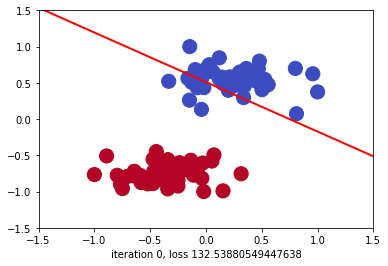

In [82]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib import animation, rc

fig, ax = plt.subplots()

w = np.array([-0.5, 1, 1])
m = 1e-3 # шаг обучения

# Данные
plt.scatter(X[:,0], X[:,1], s = 200, c = Y, cmap=cmap)

# Модель данных
line = lambda x1 : -w[1]/w[2] * x1 - w[0]/w[2]
clf, = ax.plot([X[:,0].min() - .5, X[:,0].max() + .5], [line(X[:,0].min() - .5), line(X[:,0].max() + .5)], 'r-', linewidth=2)

# Настройка графика
ax.set_xlim([X[:,0].min() - .5, X[:,0].max() + .5])
ax.set_ylim([X[:,1].min() - .5, X[:,1].max() + .5])


def update(i):
    global w, X, Y, m, k, b
    label = 'iteration {0}, loss {1}'.format(i, loss(w.reshape(-1, 1), X, Y))
#     label = 'iteration {0}'.format(i)
    
    # Градиент в примере задан постоянными величинами
    # На деле после каждой итерации необходимо пересчитывать градиент и изменять веса модели.
#     div_w0 = 10
#     div_w1 = 20
    
#     k -= m * div_w0
#     b -= m * div_w1
#     k -= m * np.sum(grad_loss(-np.array([-b, -k, 1]).reshape(-1, 1), X, Y))
    w = w - m * grad_loss(w.reshape(-1, 1), X, Y)

    line = lambda c_x : -w[1]/w[2] * c_x - w[0]/w[2]
    clf.set_ydata([line(X[:,0].min()), line(X[:,0].max())])
    ax.set_xlabel(label)
    return line, ax

anim = FuncAnimation(fig, update, frames=np.arange(0, 100))
rc('animation', html='html5')

In [83]:
anim

### Задача 3. Реализация стохастического градиентного спуска.
Используйте на каждой итерации не весь набор данных, а $n$ случайных объектов из выборки. Оформите результат схождения вашей модели в виде гифки.